In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Đọc file
path = '/content/drive/MyDrive/KHDL_TH/Benh_nhom1.csv'
data = pd.read_csv(path,index_col ='MABN')

In [ ]:
df = data.copy()
df.head()

,Unnamed: 0,Nam_Sinh,KhuVuc,Nghe_Nghiep,Dan_Toc,Ton_Giao,Trinh_Do_Hoc_Van,Tinh_Trang_hon_nhan,CoBenh,So_Lan_Mang_Thai,So_Lan_Sinh_Con,Tien_Su_Tranh_Thai,Tien_Su_Gia_Dinh,Tien_Su_MangThai
MABN,,,,,,,,,,,,,,
1,312,1973,an hanh tay,noi tro,kinh,luong,THPT,Da Ket Hon,Y,3,3,Co Dung Thuoc Tranh Thai,2,2
2,313,1983,an hanh tay,nong dan va chan nuoi,kinh,luong,THPT,Da Ket Hon,Y,2,2,Khong Dung Thuoc Tranh Thai,1,1
3,314,1993,an hanh tay,nong dan va chan nuoi,kinh,luong,"Trung cap, cao Dang",Da Ket Hon,N,1,1,Khong Dung Thuoc Tranh Thai,2,2
4,315,1978,an hanh tay,nong dan va chan nuoi,kinh,luong,"Trung cap, cao Dang",Da Ket Hon,N,2,2,Khong Dung Thuoc Tranh Thai,2,2
5,316,1971,an hanh tay,nong dan va chan nuoi,kinh,luong,"Trung cap, cao Dang",Da Ket Hon,N,2,2,Khong Dung Thuoc Tranh Thai,2,2


In [ ]:
df.shape

(795, 14)

- Nhìn qua thì dữ liệu có 13 trường và 795 bản ghi
- Các trường cho thấy các thông tin cơ bản của từng bệnh nhân
- Trường target ở đây là trường 'CoBenh'

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 1 to 795
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           795 non-null    int64 
 1   Nam_Sinh             795 non-null    int64 
 2   KhuVuc               795 non-null    object
 3   Nghe_Nghiep          795 non-null    object
 4   Dan_Toc              795 non-null    object
 5   Ton_Giao             795 non-null    object
 6   Trinh_Do_Hoc_Van     795 non-null    object
 7   Tinh_Trang_hon_nhan  795 non-null    object
 8   CoBenh               795 non-null    object
 9   So_Lan_Mang_Thai     795 non-null    int64 
 10  So_Lan_Sinh_Con      795 non-null    int64 
 11  Tien_Su_Tranh_Thai   795 non-null    object
 12  Tien_Su_Gia_Dinh     795 non-null    int64 
 13  Tien_Su_MangThai     795 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 93.2+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0             0
Nam_Sinh               0
KhuVuc                 0
Nghe_Nghiep            0
Dan_Toc                0
Ton_Giao               0
Trinh_Do_Hoc_Van       0
Tinh_Trang_hon_nhan    0
CoBenh                 0
So_Lan_Mang_Thai       0
So_Lan_Sinh_Con        0
Tien_Su_Tranh_Thai     0
Tien_Su_Gia_Dinh       0
Tien_Su_MangThai       0
dtype: int64

- Không có dữ liệu bị thiếu
- Trường 'CoBenh' đã được gán nhãn hết là 'Y', 'N' trường này không có dữ liệu thiếu

In [ ]:
df['Tuoi'] = date.today().year - df['Nam_Sinh']

In [ ]:
df['Tuoi']

MABN
1      50
2      40
3      30
4      45
5      52
       ..
791    51
792    53
793    57
794    48
795    34
Name: Tuoi, Length: 795, dtype: int64

- Tạo một trường mới có tên là 'Tuoi' , trường này được tính bằng cách lấy năm hiện tại trừ đi năm sinh
- Khi đã có tuổi thì xóa trường 'Nam_Sinh'

In [ ]:
min(df['Tuoi']),max(df['Tuoi'])

(25, 61)

In [ ]:
df['Nhom_Tuoi'] = df['Tuoi'].apply(lambda x: '<=30' if x <= 30 else ('30->40' if x <= 40 else ( '40->50' if x<= 50 else '>50')))

In [ ]:
df['Nhom_Tuoi']

MABN
1      40->50
2      30->40
3        <=30
4      40->50
5         >50
        ...  
791       >50
792       >50
793       >50
794    40->50
795    30->40
Name: Nhom_Tuoi, Length: 795, dtype: object

In [ ]:
df[['Tuoi', 'Nhom_Tuoi']]

,Tuoi,Nhom_Tuoi
MABN,,
1,50,40->50
2,40,30->40
3,30,<=30
4,45,40->50
5,52,>50
...,...,...
791,51,>50
792,53,>50
793,57,>50


In [ ]:
del df["Unnamed: 0"]  # xóa vì trường  này là trường chỉ số , trùng với trường MABN
del df['Nam_Sinh']

In [ ]:
df.head()

,KhuVuc,Nghe_Nghiep,Dan_Toc,Ton_Giao,Trinh_Do_Hoc_Van,Tinh_Trang_hon_nhan,CoBenh,So_Lan_Mang_Thai,So_Lan_Sinh_Con,Tien_Su_Tranh_Thai,Tien_Su_Gia_Dinh,Tien_Su_MangThai,Tuoi,Nhom_Tuoi
MABN,,,,,,,,,,,,,,
1,an hanh tay,noi tro,kinh,luong,THPT,Da Ket Hon,Y,3,3,Co Dung Thuoc Tranh Thai,2,2,50,40->50
2,an hanh tay,nong dan va chan nuoi,kinh,luong,THPT,Da Ket Hon,Y,2,2,Khong Dung Thuoc Tranh Thai,1,1,40,30->40
3,an hanh tay,nong dan va chan nuoi,kinh,luong,"Trung cap, cao Dang",Da Ket Hon,N,1,1,Khong Dung Thuoc Tranh Thai,2,2,30,<=30
4,an hanh tay,nong dan va chan nuoi,kinh,luong,"Trung cap, cao Dang",Da Ket Hon,N,2,2,Khong Dung Thuoc Tranh Thai,2,2,45,40->50
5,an hanh tay,nong dan va chan nuoi,kinh,luong,"Trung cap, cao Dang",Da Ket Hon,N,2,2,Khong Dung Thuoc Tranh Thai,2,2,52,>50


In [ ]:
df[df['CoBenh']=='Y']['Tuoi'].mean()

45.84033613445378

In [ ]:
df[df['CoBenh']=='N']['Tuoi'].mean()

43.15798922800718

In [ ]:
df[df['CoBenh']=='Y'].describe()

,So_Lan_Mang_Thai,So_Lan_Sinh_Con,Tien_Su_Gia_Dinh,Tien_Su_MangThai,Tuoi
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,2.050420,2.033613,1.873950,1.857143,45.840336
std,0.870023,0.865979,0.332606,0.350665,7.686344
min,0.000000,0.000000,1.000000,1.000000,25.000000
25%,2.000000,2.000000,2.000000,2.000000,40.000000
50%,2.000000,2.000000,2.000000,2.000000,46.000000
75%,2.000000,2.000000,2.000000,2.000000,51.000000
max,5.000000,5.000000,2.000000,2.000000,61.000000


In [ ]:
df[df['CoBenh']=='N'].describe()

,So_Lan_Mang_Thai,So_Lan_Sinh_Con,Tien_Su_Gia_Dinh,Tien_Su_MangThai,Tuoi
count,557.000000,557.000000,557.000000,557.000000,557.000000
mean,1.813285,1.795332,1.965889,1.951526,43.157989
std,0.958286,0.945139,0.181678,0.214959,8.907811
min,0.000000,0.000000,1.000000,1.000000,25.000000
25%,1.000000,1.000000,2.000000,2.000000,36.000000
50%,2.000000,2.000000,2.000000,2.000000,43.000000
75%,2.000000,2.000000,2.000000,2.000000,50.000000
max,5.000000,5.000000,2.000000,2.000000,61.000000


In [ ]:
df['CoBenh'].value_counts() / len(df)

N    0.700629
Y    0.299371
Name: CoBenh, dtype: float64

- Số người mắc bệnh ~ 30% (29.937) và không mắc bệnh ~70% (70. 063)

In [ ]:
df['KhuVuc'].value_counts()

an hanh tay    266
an hoa         180
an phu         134
an khuong      132
an ninh         83
Name: KhuVuc, dtype: int64

In [ ]:
df['Trinh_Do_Hoc_Van'].value_counts()

THPT                   327
Trung cap, cao Dang    288
Dai Hoc Tro Len         92
6                       67
THCS                    18
Mu Chu                   3
Name: Trinh_Do_Hoc_Van, dtype: int64

In [ ]:
df.groupby('KhuVuc')['CoBenh'].value_counts().unstack()

CoBenh,N,Y
KhuVuc,,
an hanh tay,208,58
an hoa,128,52
an khuong,57,75
an ninh,73,10
an phu,91,43


In [ ]:
def plot_bar(data, field_name):
  df_visualize = data.groupby(field_name)['CoBenh'].value_counts().unstack()

  labels = df_visualize.index
  y_values = df_visualize['Y']
  n_values = df_visualize['N']
  width = 0.35
  fig, ax = plt.subplots(figsize = (10,7))
  x = np.arange(len(labels))
  #bar1 = ax.bar(x - width/2, y_values, width, label = 'CoBenh = Y')
  #bar2 = ax.bar(x + width/2, n_values, width, label = 'CoBenh = N')

  #for i in range(len(y_values)):
    #ax.text(i - width/2, y_values[i], y_values[i], ha='center', va='bottom')
  #for i in range(len(n_values)):
    #ax.text(i + width/2, n_values[i], n_values[i], ha='center', va='bottom')


  # Tính phần trăm cho mỗi nhóm
  total_y = y_values + n_values
  percentage_y = (y_values / total_y) * 100
  percentage_n = (n_values / total_y) * 100
  bar1 = ax.bar(x - width/2, percentage_y, width, label = 'CoBenh = Y')
  bar2 = ax.bar(x + width/2, percentage_n, width, label = 'CoBenh = N')
  # Thay số lượng bằng phần trăm trong biểu đồ cột
  for i in range(len(percentage_y)):
      ax.text(i - width/2, percentage_y[i], f'{percentage_y[i]:.2f}%', ha='center', va='bottom')
  for i in range(len(percentage_n)):
      ax.text(i + width/2, percentage_n[i], f'{percentage_n[i]:.2f}%', ha='center', va='bottom')


  plt.grid(True, alpha = 0.4)
  ax.set_xlabel(field_name)
  ax.set_ylabel('Phan tram')
  ax.set_title('Phan tram mac benh theo '+field_name, fontsize = 15)
  ax.set_xticks(x)
  ax.set_xticklabels(labels, rotation=45, ha="right")  # xoay 45 do va can le ben phai
  ax.legend()

  plt.show()

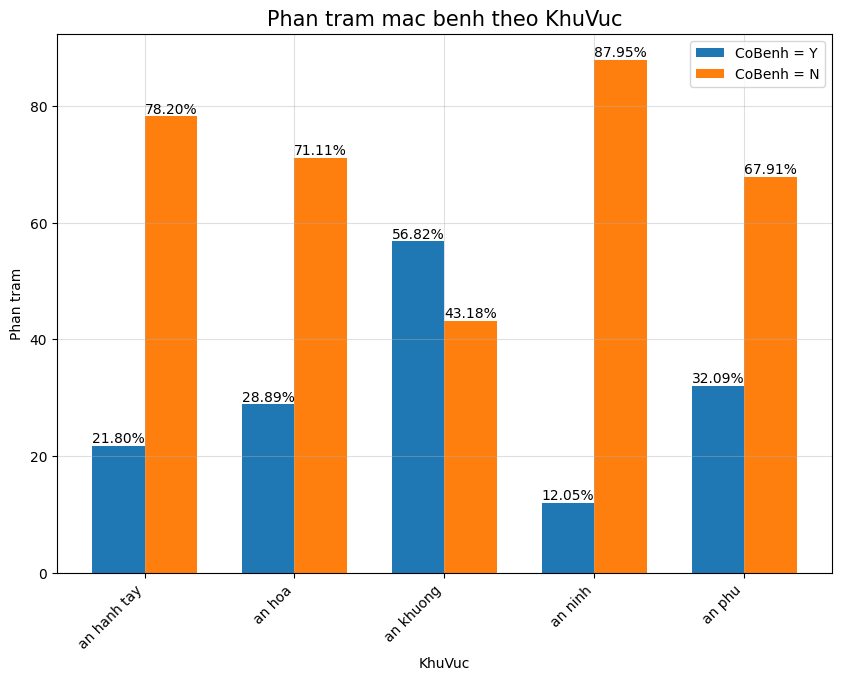

In [ ]:
plot_bar(df, 'KhuVuc')

- Dễ thấy số người bị mắc bệnh ở khu vực 'an khuong' là cao hơn so với những khu vực khác

In [ ]:
# chuyển dữ liệu về dạng số
labels_kv = {'an hanh tay': 0 , 'an hoa': 1, 'an khuong':2, 'an ninh':3, 'an phu':4}
df['KhuVuc'] = df['KhuVuc'].replace(labels_kv.keys(), labels_kv.values())

In [ ]:
df['KhuVuc'].unique()

array([0, 4, 3, 2, 1])

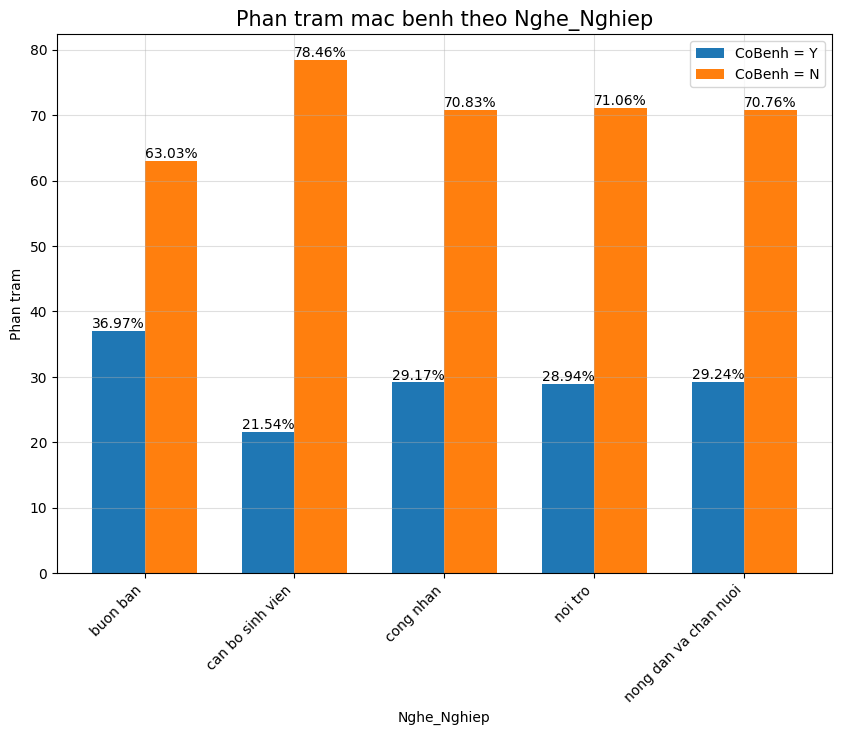

In [ ]:
plot_bar(df, 'Nghe_Nghiep')

- Có thể nghề 'buon ban' và 'noi tro' thường xuyên tiếp xúc với nhiều người ở nhiều nơi nên dễ mắc bệnh hơn

In [ ]:
labels_nn = {'buon ban':0, 'can bo sinh vien':1, 'cong nhan':2, 'noi tro':3, 'nong dan va chan nuoi':4}
df['Nghe_Nghiep'] = df['Nghe_Nghiep'].replace(labels_nn.keys(), labels_nn.values())

In [ ]:
df['Nghe_Nghiep'].unique()

array([3, 4, 1, 0, 2])

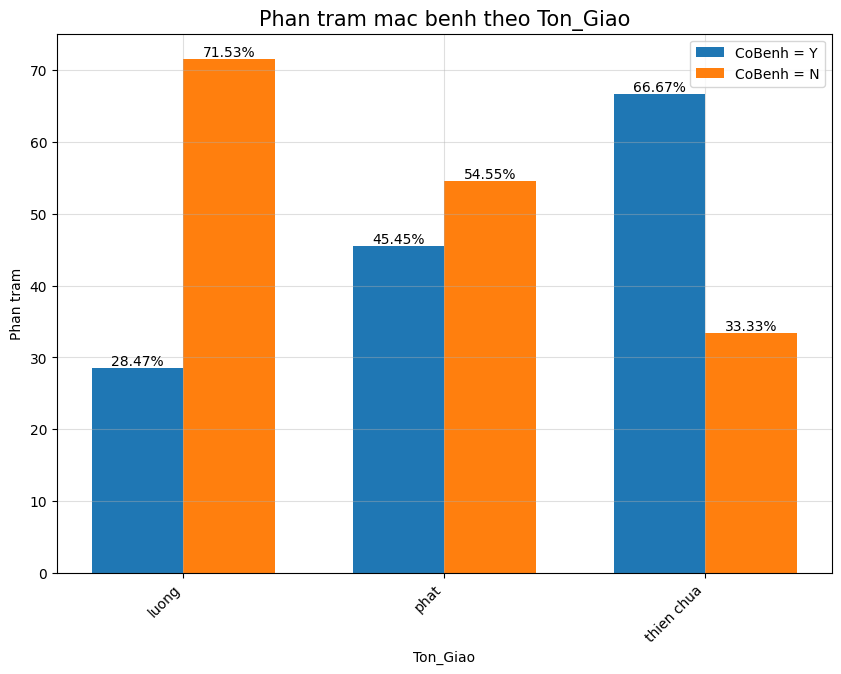

In [ ]:
plot_bar(df, 'Ton_Giao')

In [ ]:
labels_tg = {'luong':0, 'phat':1, 'thien chua':2}
df['Ton_Giao'] = df['Ton_Giao'].replace(labels_tg.keys(), labels_tg.values())
df['Ton_Giao'].unique()

array([0, 1, 2])

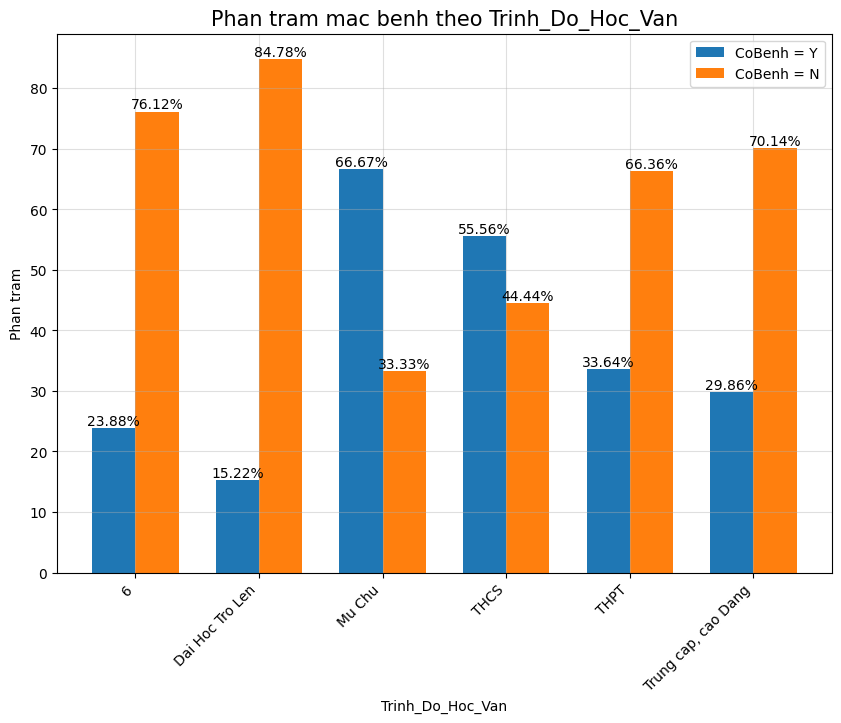

In [ ]:
plot_bar(df, 'Trinh_Do_Hoc_Van')

In [ ]:
labels_hv = {'Mu Chu':0, 'THCS':1, 'THPT':2, 'Trung cap, cao Dang':3, 'Dai Hoc Tro Len':4, '6':5}
df['Trinh_Do_Hoc_Van'] = df['Trinh_Do_Hoc_Van'].replace(labels_hv.keys(), labels_hv.values())
df['Trinh_Do_Hoc_Van'].unique()

array([2, 3, 4, 5, 1, 0])

In [ ]:
df.head()

,KhuVuc,Nghe_Nghiep,Dan_Toc,Ton_Giao,Trinh_Do_Hoc_Van,Tinh_Trang_hon_nhan,CoBenh,So_Lan_Mang_Thai,So_Lan_Sinh_Con,Tien_Su_Tranh_Thai,Tien_Su_Gia_Dinh,Tien_Su_MangThai,Tuoi,Nhom_Tuoi
MABN,,,,,,,,,,,,,,
1,0,3,kinh,0,2,Da Ket Hon,Y,3,3,Co Dung Thuoc Tranh Thai,2,2,50,40->50
2,0,4,kinh,0,2,Da Ket Hon,Y,2,2,Khong Dung Thuoc Tranh Thai,1,1,40,30->40
3,0,4,kinh,0,3,Da Ket Hon,N,1,1,Khong Dung Thuoc Tranh Thai,2,2,30,<=30
4,0,4,kinh,0,3,Da Ket Hon,N,2,2,Khong Dung Thuoc Tranh Thai,2,2,45,40->50
5,0,4,kinh,0,3,Da Ket Hon,N,2,2,Khong Dung Thuoc Tranh Thai,2,2,52,>50


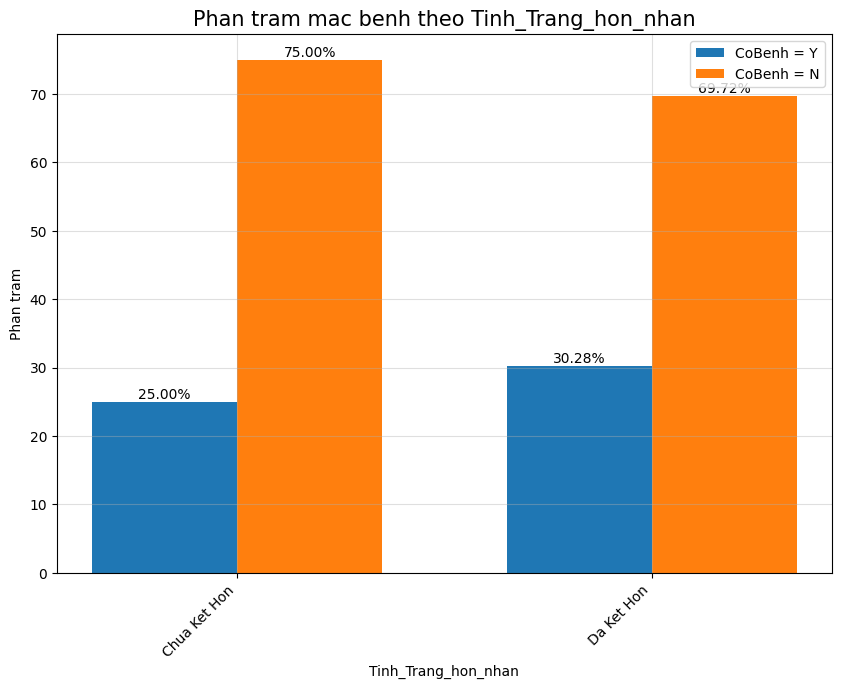

In [ ]:
plot_bar(df, "Tinh_Trang_hon_nhan")

In [ ]:
df['Tinh_Trang_hon_nhan'] = df['Tinh_Trang_hon_nhan'].apply(lambda x: 0 if x =='Chua Ket Hon' else 1)
df['Tinh_Trang_hon_nhan'].unique()

array([1, 0])

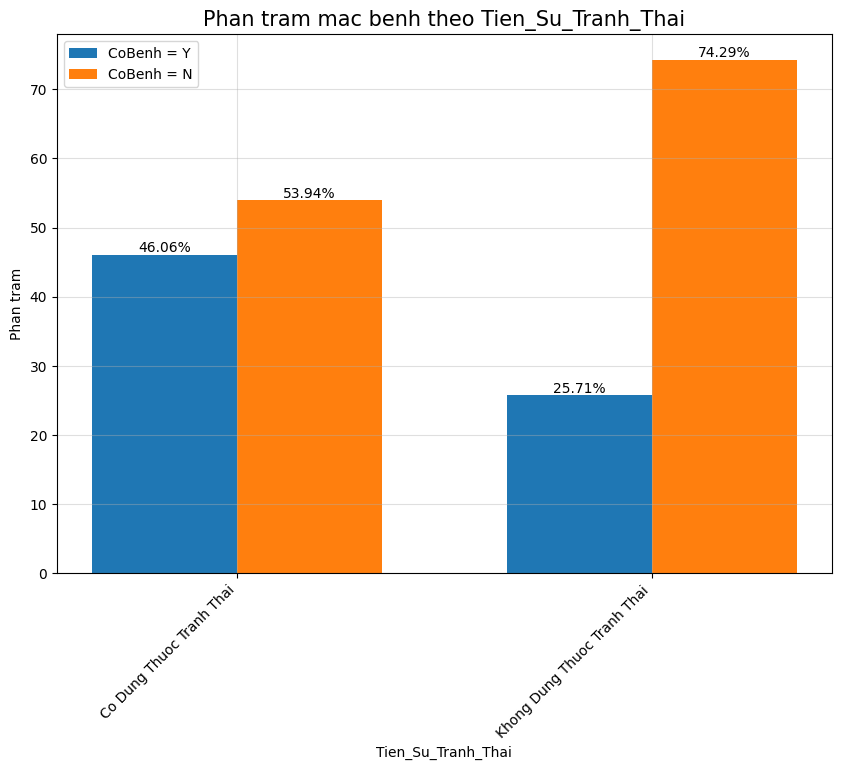

In [ ]:
plot_bar(df,"Tien_Su_Tranh_Thai")

In [ ]:
df['Tien_Su_Tranh_Thai'] = df['Tien_Su_Tranh_Thai'].apply(lambda x: 0 if x == 'Khong Dung Thuoc Tranh Thai' else 1)
df['Tien_Su_Tranh_Thai'].unique()

array([1, 0])

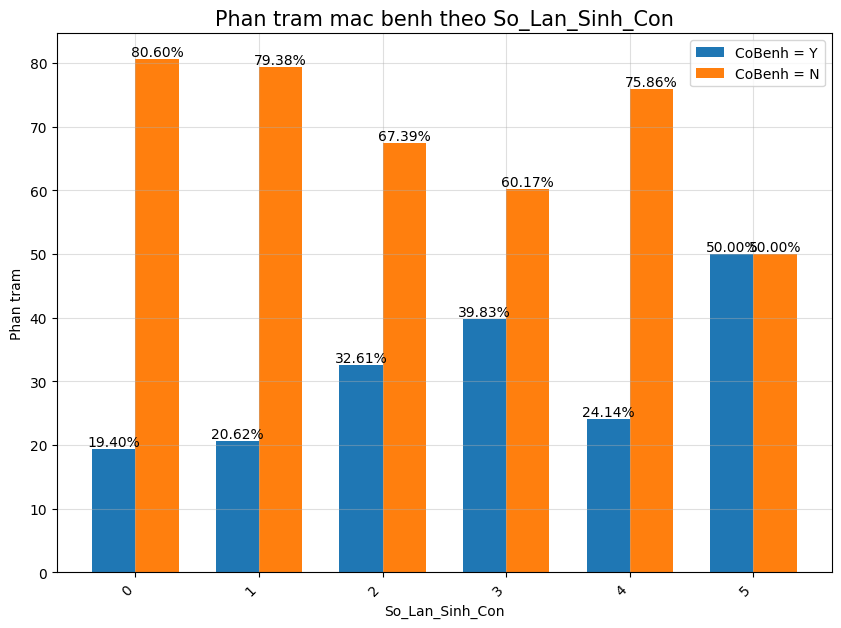

In [ ]:
plot_bar(df, 'So_Lan_Sinh_Con')

In [ ]:
#plot_bar(df, 'So_Lan_Mang_Thai')

In [ ]:
df['Dan_Toc'].value_counts()

kinh    794
khac      1
Name: Dan_Toc, dtype: int64

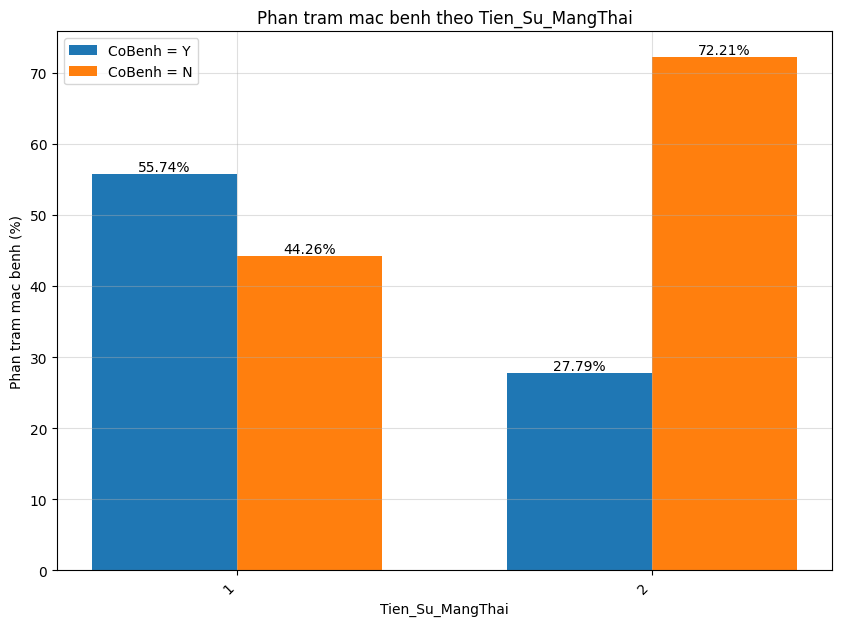

In [ ]:
#def plot_bar(data, field_name):
df_visualize = df.groupby("Tien_Su_MangThai")['CoBenh'].value_counts().unstack()

labels = df_visualize.index
y_values = df_visualize['Y']
n_values = df_visualize['N']

width = 0.35
fig, ax = plt.subplots(figsize = (10,7))
x = np.arange(len(labels))
# Tính phần trăm cho mỗi nhóm
total_y = y_values + n_values
percentage_y = (y_values / total_y) * 100
percentage_n = (n_values / total_y) * 100

bar1 = ax.bar(x - width/2, percentage_y, width, label = 'CoBenh = Y')
bar2 = ax.bar(x + width/2, percentage_n, width, label = 'CoBenh = N')
# Thay số lượng bằng phần trăm trong biểu đồ cột
for i in range(1, len(percentage_y)+1):
    ax.text(i-1 - width/2, percentage_y[i], f'{percentage_y[i]:.2f}%', ha='center', va='bottom')
for i in range(1, len(percentage_n)+1):
    ax.text(i-1 + width/2, percentage_n[i], f'{percentage_n[i]:.2f}%', ha='center', va='bottom')

plt.grid(True, alpha=0.4)
ax.set_xlabel("Tien_Su_MangThai")
ax.set_ylabel('Phan tram mac benh (%)')
ax.set_title('Phan tram mac benh theo ' + "Tien_Su_MangThai")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

plt.show()

In [ ]:
df['Dan_Toc'] = df['Dan_Toc'].apply(lambda x: 1 if x=='kinh' else 0)
df['Dan_Toc'].unique()

array([1, 0])

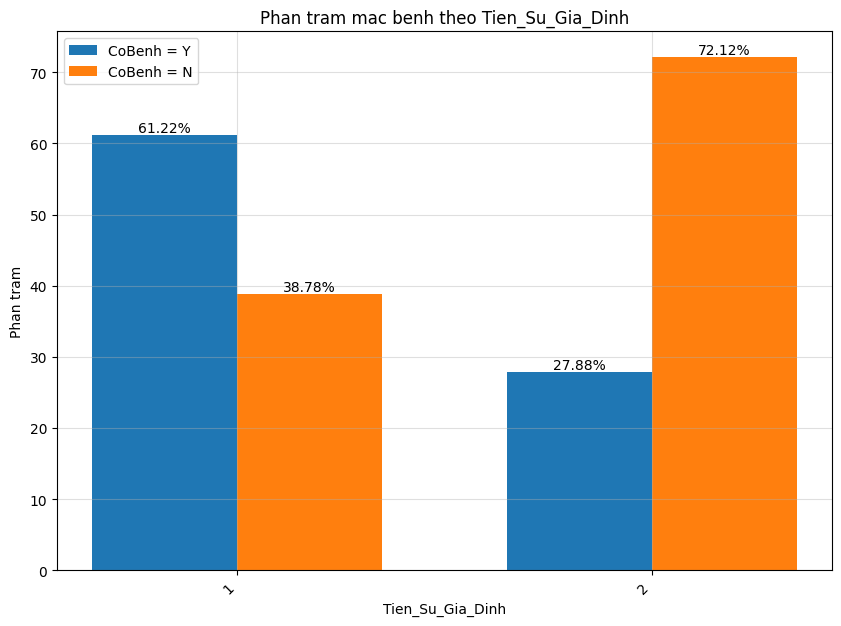

In [ ]:
df_visualize = df.groupby("Tien_Su_Gia_Dinh")['CoBenh'].value_counts().unstack()

labels = df_visualize.index
y_values = df_visualize['Y']
n_values = df_visualize['N']

width = 0.35
fig, ax = plt.subplots(figsize = (10,7))
x = np.arange(len(labels))
# Tính phần trăm cho mỗi nhóm
total_y = y_values + n_values
percentage_y = (y_values / total_y) * 100
percentage_n = (n_values / total_y) * 100

bar1 = ax.bar(x - width/2, percentage_y, width, label = 'CoBenh = Y')
bar2 = ax.bar(x + width/2, percentage_n, width, label = 'CoBenh = N')
# Thay số lượng bằng phần trăm trong biểu đồ cột
for i in range(1, len(percentage_y)+1):
    ax.text(i-1 - width/2, percentage_y[i], f'{percentage_y[i]:.2f}%', ha='center', va='bottom')
for i in range(1, len(percentage_n)+1):
    ax.text(i-1 + width/2, percentage_n[i], f'{percentage_n[i]:.2f}%', ha='center', va='bottom')

plt.grid(True, alpha=0.4)
ax.set_xlabel("Tien_Su_Gia_Dinh")
ax.set_ylabel('Phan tram')
ax.set_title('Phan tram mac benh theo ' + "Tien_Su_Gia_Dinh")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

plt.show()

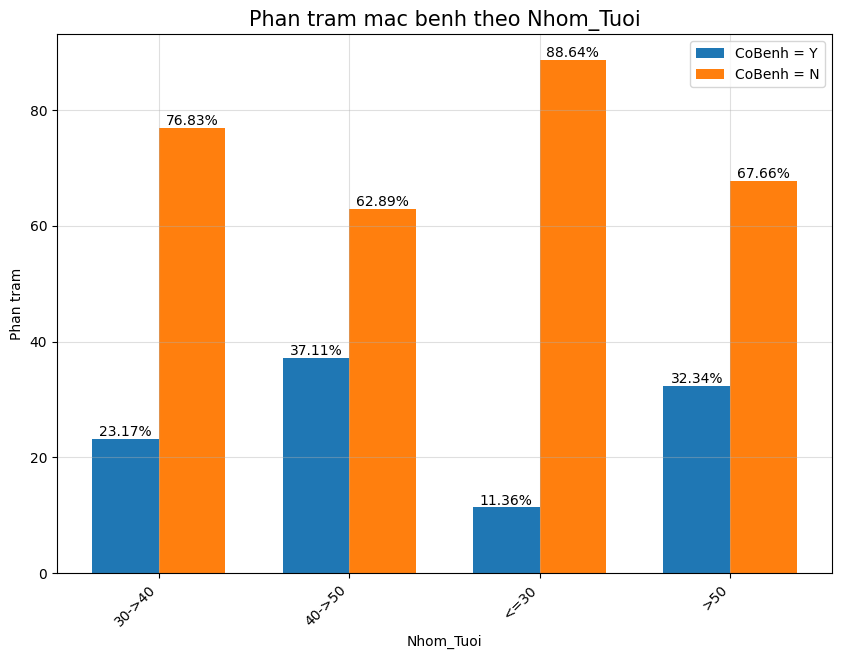

In [ ]:
plot_bar(df,'Nhom_Tuoi')

In [ ]:
labels_t = {'<=30':0, '30->40':1,'40->50':2, '>50':3}
df['Nhom_Tuoi'] = df['Nhom_Tuoi'].replace(labels_t.keys(), labels_t.values())
df['Nhom_Tuoi'].unique()

array([2, 1, 0, 3])

In [ ]:
# sau khi có nhóm tuổi thì xóa đi trường tuổi
del df['Tuoi']

In [ ]:
# đưa trường target về dạng số
df['CoBenh'] = df['CoBenh'].apply(lambda x: 1 if x=='Y' else 0) # no : 0, yes : 1
df['CoBenh'].unique()

array([1, 0])

In [ ]:
df.head()

,KhuVuc,Nghe_Nghiep,Dan_Toc,Ton_Giao,Trinh_Do_Hoc_Van,Tinh_Trang_hon_nhan,CoBenh,So_Lan_Mang_Thai,So_Lan_Sinh_Con,Tien_Su_Tranh_Thai,Tien_Su_Gia_Dinh,Tien_Su_MangThai,Nhom_Tuoi
MABN,,,,,,,,,,,,,
1,0,3,1,0,2,1,1,3,3,1,2,2,2
2,0,4,1,0,2,1,1,2,2,0,1,1,1
3,0,4,1,0,3,1,0,1,1,0,2,2,0
4,0,4,1,0,3,1,0,2,2,0,2,2,2
5,0,4,1,0,3,1,0,2,2,0,2,2,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 1 to 795
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   KhuVuc               795 non-null    int64
 1   Nghe_Nghiep          795 non-null    int64
 2   Dan_Toc              795 non-null    int64
 3   Ton_Giao             795 non-null    int64
 4   Trinh_Do_Hoc_Van     795 non-null    int64
 5   Tinh_Trang_hon_nhan  795 non-null    int64
 6   CoBenh               795 non-null    int64
 7   So_Lan_Mang_Thai     795 non-null    int64
 8   So_Lan_Sinh_Con      795 non-null    int64
 9   Tien_Su_Tranh_Thai   795 non-null    int64
 10  Tien_Su_Gia_Dinh     795 non-null    int64
 11  Tien_Su_MangThai     795 non-null    int64
 12  Nhom_Tuoi            795 non-null    int64
dtypes: int64(13)
memory usage: 87.0 KB


<ipython-input-174-99f996bc0459>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


<Axes: >

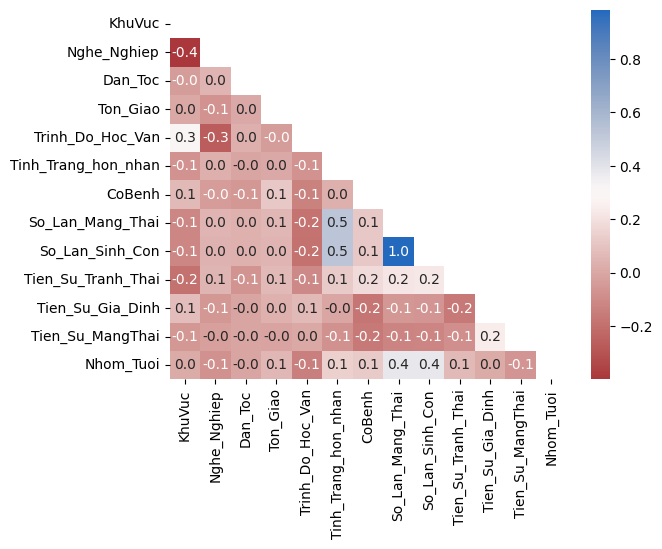

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot = True, fmt = '.1f',  cmap = 'vlag_r',mask = mask)

In [ ]:
del df['So_Lan_Mang_Thai']
del df['Dan_Toc']

In [ ]:
df.head()

,KhuVuc,Nghe_Nghiep,Ton_Giao,Trinh_Do_Hoc_Van,Tinh_Trang_hon_nhan,CoBenh,So_Lan_Sinh_Con,Tien_Su_Tranh_Thai,Tien_Su_Gia_Dinh,Tien_Su_MangThai,Nhom_Tuoi
MABN,,,,,,,,,,,
1,0,3,0,2,1,1,3,1,2,2,2
2,0,4,0,2,1,1,2,0,1,1,1
3,0,4,0,3,1,0,1,0,2,2,0
4,0,4,0,3,1,0,2,0,2,2,2
5,0,4,0,3,1,0,2,0,2,2,3


In [ ]:
# Statified sampling  imbalanced dataset

Model

In [ ]:
df.columns

Index(['KhuVuc', 'Nghe_Nghiep', 'Ton_Giao', 'Trinh_Do_Hoc_Van',
       'Tinh_Trang_hon_nhan', 'CoBenh', 'So_Lan_Sinh_Con',
       'Tien_Su_Tranh_Thai', 'Tien_Su_Gia_Dinh', 'Tien_Su_MangThai',
       'Nhom_Tuoi'],
      dtype='object')

In [ ]:
X = df.drop(columns = 'CoBenh')
y = df['CoBenh']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:

conf = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print('LogisticRegression')
print(f'Accuracy: {accuracy}')

print(f'Roc_AUC: {roc_auc}')
print(f'Confusion matrix: \n{conf}')

LogisticRegression
Accuracy: 0.7238493723849372
Roc_AUC: 0.5899982800137599
Confusion matrix: 
[[154  17]
 [ 49  19]]


In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
svm_pred = svm.predict(X_test)

In [ ]:

conf1 = confusion_matrix(y_test, svm_pred)
accuracy1 = accuracy_score(y_test, svm_pred)
roc_auc1 = roc_auc_score(y_test, svm_pred)
print('SVM')
print(f'Accuracy: {accuracy1}')

print(f'Roc_AUC: {roc_auc1}')
print(f'Confusion matrix: \n{conf1}')

SVM
Accuracy: 0.7196652719665272
Roc_AUC: 0.5206398348813209
Confusion matrix: 
[[168   3]
 [ 64   4]]


In [ ]:
X_test.shape

(239, 10)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
gnb_pred = gnb.predict(X_test)

In [ ]:

conf2 = confusion_matrix(y_test, gnb_pred)
accuracy2 = accuracy_score(y_test, gnb_pred)
roc_auc2 = roc_auc_score(y_test, gnb_pred)
print('GausianNB')
print(f'Accuracy: {accuracy2}')

print(f'Roc_AUC: {roc_auc2}')
print(f'Confusion matrix: \n{conf2}')

GausianNB
Accuracy: 0.7405857740585774
Roc_AUC: 0.65484176126591
Confusion matrix: 
[[146  25]
 [ 37  31]]


In [ ]:
posterior_prob = gnb.predict_proba(X_test)
for i, probs in enumerate(posterior_prob):
    print(f"Sample {i + 1} - Predicted Class: {gnb_pred[i]}")
    for j, prob in enumerate(probs):
        print(f"   Class {j}: {prob:.4f}")

In [ ]:
svm_p = SVC(probability =True)
svm_p.fit(X_train, y_train)
svm_p.predict_proba(X_test)


y_pred_pro = model.predict_proba(X_test)
svm_pred_pro = svm_p.predict_proba(X_test)
gnb_pred_proba = gnb.predict_proba(X_test)

In [ ]:
pr = y_pred_pro[:,1]
pr1 = svm_pred_pro[:,1]
pr2 = gnb_pred_proba[:,1]

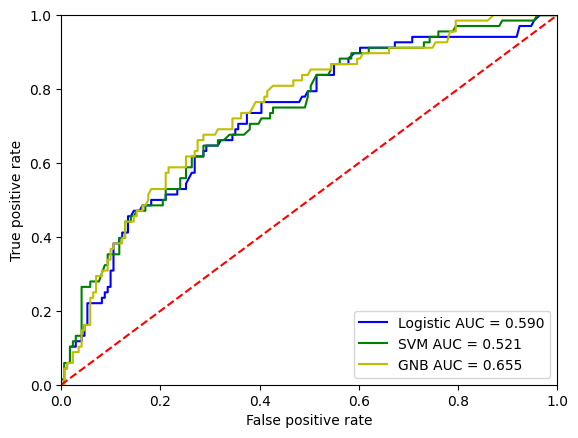

In [ ]:
fpr, tpr , _ = roc_curve(y_test, pr)
fpr1, tpr1 , _ = roc_curve(y_test, pr1)
fpr2, tpr2 , _ = roc_curve(y_test, pr2)
plt.plot(fpr, tpr, 'b', label='Logistic AUC = %0.3f' % roc_auc)
plt.plot(fpr1, tpr1, 'g', label='SVM AUC = %0.3f' % roc_auc1)
plt.plot(fpr2, tpr2, 'y', label='GNB AUC = %0.3f' % roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = 'lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [ ]:
data = {
    'Model': ['Logistic Regression', 'SVM', 'Gaussian Naive Bayes'],
    'Confusion Matrix': [conf, conf1, conf2],
    'Accuracy': [accuracy, accuracy1, accuracy2],
    'ROC AUC': [roc_auc, roc_auc1, roc_auc2]
}
comparison_df = pd.DataFrame(data)
comparison_df

,Model,Confusion Matrix,Accuracy,ROC AUC
0,Logistic Regression,"[[154, 17], [49, 19]]",0.723849,0.589998
1,SVM,"[[168, 3], [64, 4]]",0.719665,0.520640
2,Gaussian Naive Bayes,"[[146, 25], [37, 31]]",0.740586,0.654842
